<a href="https://colab.research.google.com/github/rahcoderepo/NLP/blob/main/Oct4_AICourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

url = "https://raw.githubusercontent.com/Zorro-De-La-Vega/NLP/refs/heads/main/tmdb_5000_movies.csv"
df = pd.read_csv(url)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Fill missing values in 'overview' with an empty string
df['overview'] = df['overview'].fillna('')

# Display the first 5 rows of the 'overview' column
df['overview'].head()


,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."


In [ ]:
# MORE ADVANCED Preprocessing SO RUN THIS CEL OR THE NEXT BUT NOT BOTH!
# Import necessary libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define a text preprocessing function
def preprocess_text(text):
    # Convert to string if it's not already
    if not isinstance(text, str):
        text = str(text)

    # 1. Lowercase the text
    text = text.lower()

    # 2. Tokenize the text
    tokens = word_tokenize(text)

    # 3. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # 4. Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# YOU WOULD NEED TO CHANGE THIS FOR YOUR DATASET!!!!  MINE - THE COLUMN OF INTEREST IS OVERVIEW
# Ensure all values in 'overview' are strings
df['tokenized_overview'] = df['overview'].astype(str)

# Apply the text preprocessing function directly to the 'overview' column
df['tokenized_overview'] = df['tokenized_overview'].apply(preprocess_text)

# Display the first 5 rows of the 'overview' column after preprocessing
df['tokenized_overview'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokenized_overview
0,"[22nd, century, paraplegic, marine, dispatched..."
1,"[captain, barbossa, long, believed, dead, come..."
2,"[cryptic, message, bond, past, sends, trail, u..."
3,"[following, death, district, attorney, harvey,..."
4,"[john, carter, former, military, captain, inex..."


In [ ]:
# # Tokenize the 'overview' column
# df['tokenized_overview'] = df['overview'].apply(lambda x: x.split())

# # Display tokenized text
# df['tokenized_overview'].head()


In [ ]:
# Create a Word2Vec model
model = Word2Vec(sentences=df['tokenized_overview'], vector_size=100, window=5, min_count=1, workers=4)

# Display the vocabulary size
print(f"Vocabulary size: {len(model.wv.index_to_key)}")

Vocabulary size: 18530


In [ ]:
# Function to generate an embedding for each movie overview
def get_movie_embedding(tokenized_text, model, embedding_size=100):
    # Get word embeddings for each word in the tokenized text
    valid_embeddings = [model.wv[word] for word in tokenized_text if word in model.wv]

    # If no valid embeddings, return a zero vector of the same size as the word vectors
    if len(valid_embeddings) == 0:
        return np.zeros(embedding_size)

    # Otherwise, return the mean of the valid embeddings
    return np.mean(valid_embeddings, axis=0)

# Apply the function to generate embeddings for each movie
# Make sure to define the embedding size to match the model's vector size
embedding_size = model.vector_size
df['movie_embedding'] = df['tokenized_overview'].apply(lambda x: get_movie_embedding(x, model, embedding_size=embedding_size))


In [ ]:
# Check for invalid embeddings (e.g., NaNs or wrong shapes)
invalid_embeddings = df['movie_embedding'].apply(lambda x: x.shape[0] != embedding_size or np.any(np.isnan(x)))

# Print the number of invalid embeddings
print(f"Number of invalid embeddings: {invalid_embeddings.sum()}")

# Filter out invalid embeddings, if any
df = df[~invalid_embeddings]

Number of invalid embeddings: 0


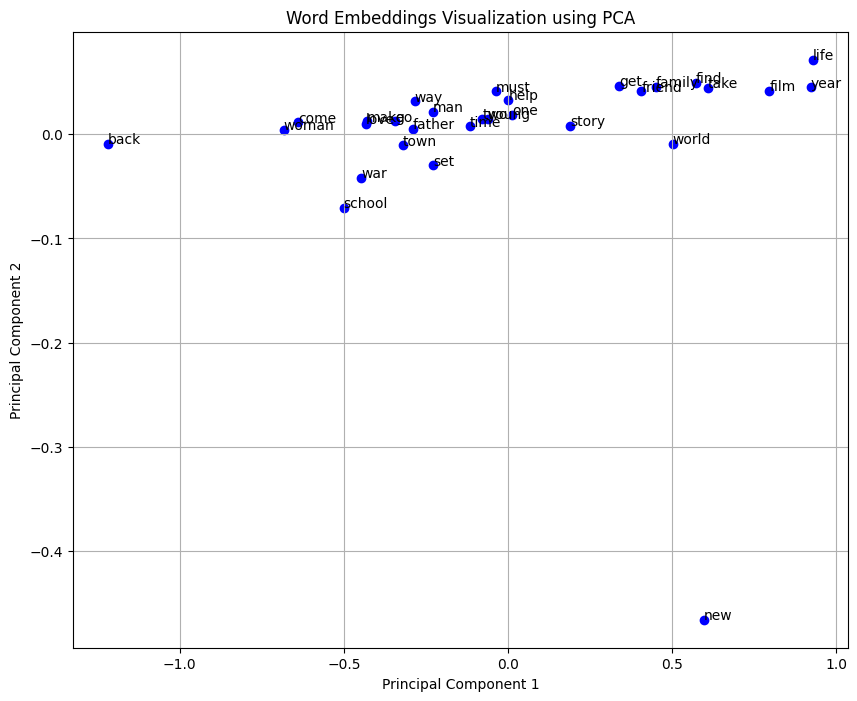

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select 30 random words from the vocabulary
words = list(model.wv.index_to_key)[:30]

# Get the word embeddings for these words
word_vectors = [model.wv[word] for word in words]

# Use PCA to reduce the word vectors to 2 dimensions
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], c='blue')

# Annotate each point with the word
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

# Display the plot
plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

In [ ]:
# Calculate cosine similarity between movie embeddings
embeddings_matrix = np.vstack(df['movie_embedding'].values)
cosine_sim = cosine_similarity(embeddings_matrix)

# Display the shape of the similarity matrix
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

Cosine similarity matrix shape: (4803, 4803)


In [ ]:
# Calculate cosine similarity between movie embeddings
embeddings_matrix = np.vstack(df['movie_embedding'].values)
cosine_sim = cosine_similarity(embeddings_matrix)

# Create a DataFrame for the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])

# Display the first 30 movies and their similarities
cosine_sim_df_subset = cosine_sim_df.iloc[:30, :30]
cosine_sim_df_subset.head()


title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,The Amazing Spider-Man,Robin Hood,The Hobbit: The Desolation of Smaug,The Golden Compass,King Kong,Titanic,Captain America: Civil War,Battleship,Jurassic World,Skyfall
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.999957,0.999963,0.999895,0.999967,0.999956,0.999956,0.999970,0.999954,0.999926,...,0.999967,0.999968,0.999940,0.999945,0.999786,0.999962,0.999971,0.999977,0.999937,0.999963
Pirates of the Caribbean: At World's End,0.999957,1.000000,0.999971,0.999878,0.999960,0.999966,0.999957,0.999971,0.999956,0.999922,...,0.999973,0.999968,0.999963,0.999953,0.999767,0.999966,0.999974,0.999979,0.999931,0.999960
Spectre,0.999963,0.999971,1.000000,0.999888,0.999971,0.999956,0.999965,0.999973,0.999959,0.999922,...,0.999970,0.999969,0.999951,0.999951,0.999758,0.999959,0.999977,0.999981,0.999939,0.999967
The Dark Knight Rises,0.999895,0.999878,0.999888,1.000000,0.999908,0.999890,0.999911,0.999907,0.999920,0.999974,...,0.999913,0.999901,0.999874,0.999899,0.999937,0.999893,0.999905,0.999915,0.999897,0.999946
John Carter,0.999967,0.999960,0.999971,0.999908,1.000000,0.999959,0.999966,0.999976,0.999958,0.999941,...,0.999970,0.999970,0.999950,0.999949,0.999798,0.999958,0.999981,0.999983,0.999954,0.999972


In [ ]:
# Create a mapping from movie title to index
movie_indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Function to recommend movies based on cosine similarity
def recommend_movies(title, cosine_sim=cosine_sim, df=df, movie_indices=movie_indices):
    # Get the index of the movie that matches the title
    idx = movie_indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

# Example: Recommend movies similar to 'Avatar'
recommendations = recommend_movies('Avatar')
print(recommendations)

2499                        Enter the Void
2806    Tae Guk Gi: The Brotherhood of War
2967            E.T. the Extra-Terrestrial
1449                             The Order
2893                                 Trade
925                   Crazy, Stupid, Love.
3375                               Redbelt
27                              Battleship
486                  The Last Witch Hunter
1163                         Scary Movie 4
Name: title, dtype: object


In [ ]:
# Function to recommend movies based on cosine similarity
def recommend_movies_with_scores(title, cosine_sim=cosine_sim, df=df, movie_indices=movie_indices):
    # Get the index of the movie that matches the title
    idx = movie_indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices and similarity scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]  # Skip the first item since it's the movie itself

    # Get the movie indices and similarity scores separately
    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Create a DataFrame with movie titles and their similarity scores
    recommendations_df = pd.DataFrame({
        'Movie Title': df['title'].iloc[movie_indices].values,
        'Similarity Score': similarity_scores
    })

    return recommendations_df

# Example: Recommend movies similar to 'Avatar' and print titles with scores
recommendations_with_scores = recommend_movies_with_scores('Avatar')
print(recommendations_with_scores)


                          Movie Title  Similarity Score
0                      Enter the Void          0.999979
1  Tae Guk Gi: The Brotherhood of War          0.999978
2          E.T. the Extra-Terrestrial          0.999978
3                           The Order          0.999978
4                               Trade          0.999977
5                Crazy, Stupid, Love.          0.999977
6                             Redbelt          0.999977
7                          Battleship          0.999977
8               The Last Witch Hunter          0.999977
9                       Scary Movie 4          0.999977


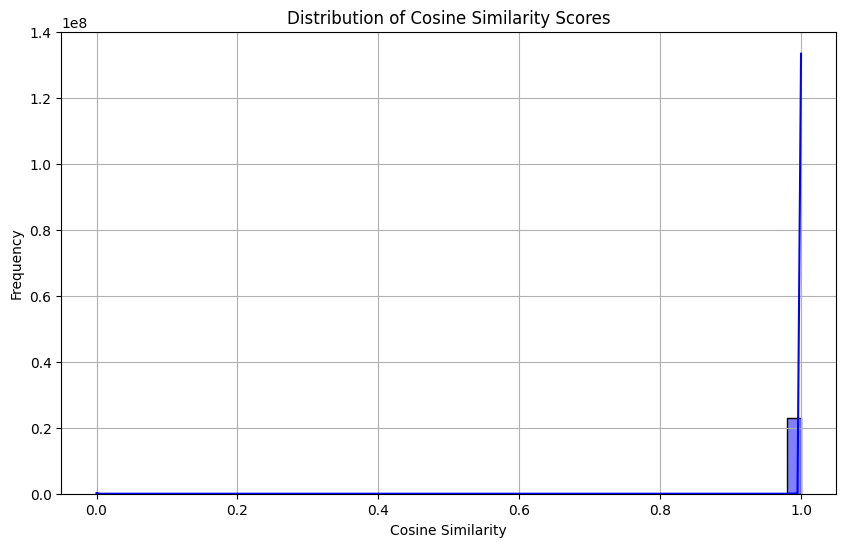

Overview Length Statistics:
count    4803.000000
mean      305.207995
std       162.886559
min         0.000000
25%       177.500000
50%       283.000000
75%       392.000000
max      1000.000000
Name: overview_length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of cosine similarity scores for all movies
all_sim_scores = cosine_sim.flatten()

# Plot the distribution of similarity scores
plt.figure(figsize=(10, 6))
sns.histplot(all_sim_scores, bins=50, kde=True, color='blue')
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Check the length of the movie overviews
df['overview_length'] = df['overview'].apply(lambda x: len(x))
print("Overview Length Statistics:")
print(df['overview_length'].describe())
